#### Toyota_Corolla data => Predict the price based on the following input parameters:-

**x1 => Age_08_04 (Age in years)** 

**x2 => KM (Accumulated Kilometers on odometer)**

**x3 => HP (Horse Power)**

**x4 => cc (Cylinder Volume in cubic centimeters)**

**x5 => Doors (Number of doors)**

**x6 => Gears (Number of gear positions)**

**x7 => Quarterly_Tax (Quarterly road tax in EUROs)**

**x8 => Weight (in kg)**

##### y  => Price (Offer Price in EUROs)  => Output parameter

### 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### 2. Importing dataset

In [2]:
car_data = pd.read_csv('ToyotaCorolla.csv')
car_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### 3. Initial Data Analysis

In [3]:
car_data.shape   # To get the total no. of rows and columns

(1436, 38)

In [4]:
car_data = pd.concat([car_data.iloc[:,2:4],car_data.iloc[:,6:7],car_data.iloc[:,8:9],car_data.iloc[:,12:14],car_data.iloc[:,15:18]],axis=1)
car_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
car_data.isna().sum()   # To check for null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
car_data.dtypes  # To get the datatypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [7]:
car_data.head(6)   # To get the data of first 6 columns to check for any discrepancy

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170


In [8]:
car_data = car_data.rename(columns ={'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'}, inplace=False)
car_data.head()                     
                                                          # Renaming of column headings to meaningful short names

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
car_data[car_data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
car_data = car_data.drop_duplicates().reset_index(drop=True)
car_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [11]:
car_data.describe()      # describe -> to get a summary of statistics with respect to df columns

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### 4. Data Visualization 

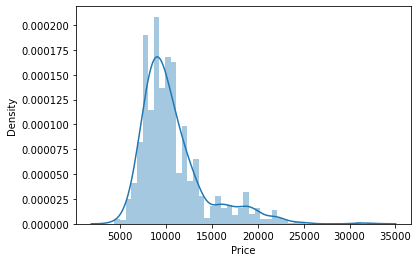

In [12]:
sns.distplot(car_data['Price'])                # Shows right-skewed distribution
plt.show()

**Conclusion -**
- There are more cheaper cars in our dataset than expensive cars.

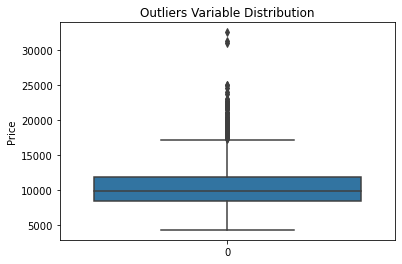

In [13]:
sns.boxplot(data= car_data['Price'], width= 0.8)        # Many outliers detected                                                           
plt.title("Outliers Variable Distribution")
plt.ylabel("Price")
plt.show()

#### Correlation Analysis

In [14]:
car_corr = car_data.corr()   
car_corr

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


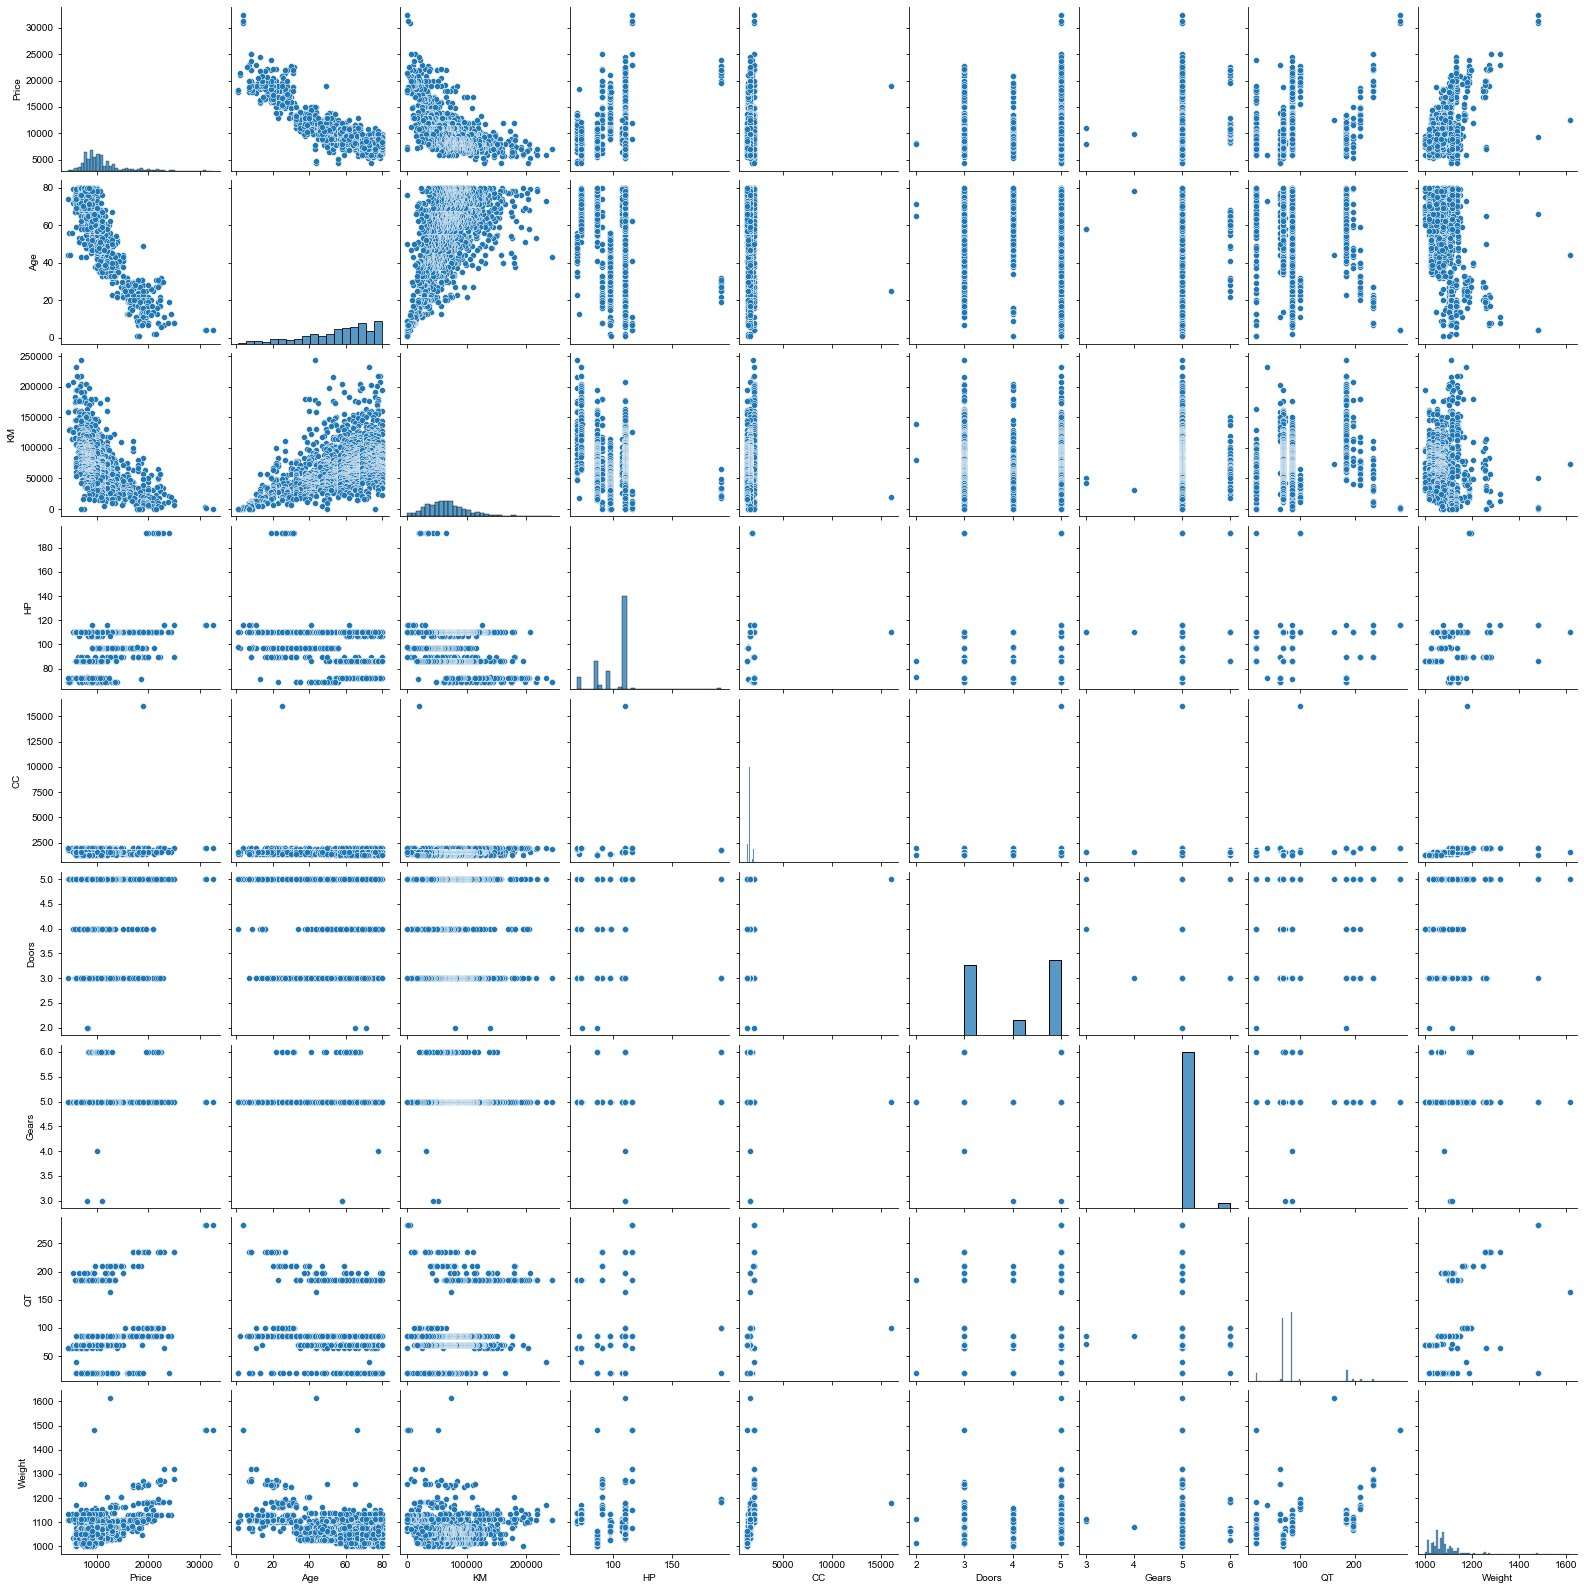

In [15]:
sns.pairplot(car_data)              # To check the association between the variables
sns.set_style('darkgrid')
plt.show()

### 5. Model Building 

In [16]:
ols_reg = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=car_data).fit()

In [17]:
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:37:12   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6. Model Testing

In [18]:
ols_reg.params                       #Finding Coefficient parameters

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [19]:
round(ols_reg.tvalues,4)                # Finding t-values 

Intercept    -3.8753
Age         -46.5519
KM          -16.5524
HP           11.2097
CC           -1.3164
Doors        -0.0230
Gears         3.0346
QT            2.9442
Weight       15.7607
dtype: float64

In [20]:
np.round(ols_reg.pvalues,4)             # Finding p-values 

Intercept    0.0001
Age          0.0000
KM           0.0000
HP           0.0000
CC           0.1882
Doors        0.9816
Gears        0.0025
QT           0.0033
Weight       0.0000
dtype: float64

**From the summary table, we can conclude :-**
- R2 score = 0.863
- Adjusted R2 score = 0.862  (Model accuracy = 86.2%)

### Hypothesis Formulation:

- H0 : It is not a significant parameter.
- Ha : It is a significant parameter.

#### If p_value < 0.05, then there is a good association between the input and output variables and we reject the null hypothesis. 

#### The variables with P > |t| i.e. p-value greater than 0.05 will be considered to fit the model again and get more accuracy.

**For 'cc' = Cylinder Volume in cubic centimeters & 'Doors' = Number of doors, since p-value is greater than 0.05, we will combine these two inputs against the output, i.e., 'Price' and try to fit the model again.** 

In [21]:
smf_model = smf.ols('Price~CC+Doors',data=car_data).fit()         # Fitting CC & Doors against Price              

In [22]:
smf_model.tvalues         # t-values after fitting CC & Doors against Price

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64

In [23]:
smf_model.pvalues         # p-values after fitting CC & Doors against Price

Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64

### 7. Model Validation

*It can be done by 2 methods:-* 
1. Collinearity Check
2. Residual Analysis

#### 1. Collinearity Check

In [24]:
# Variance inflation factor, (VIF) = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=car_data).fit().rsquared    # Age against other variables
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=car_data).fit().rsquared     # KM against other variables
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=car_data).fit().rsquared     # HP against other variables
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=car_data).fit().rsquared     # CC against other variables
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=car_data).fit().rsquared     # Doors against other variables
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=car_data).fit().rsquared     # Gears against other variables
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=car_data).fit().rsquared     # QT against other variables
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=car_data).fit().rsquared     # Weight against other variables
vif_WT=1/(1-rsq_WT)

In [25]:
df ={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
     'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df = pd.DataFrame(df)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


**Inference -** 
- None of the variables have VIF>20, so there is no Collinearity and we will consider all variables in the Regression equation

#### 2. Residual Analysis

**Test for Normality of Residuals (Q-Q Plot) using residual model**

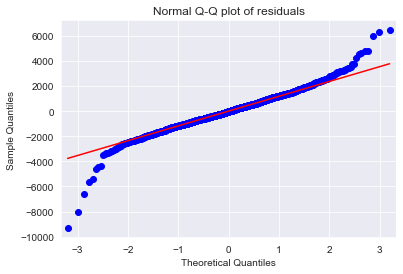

In [26]:
sm.qqplot(ols_reg.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(ols_reg.resid>6000))  # outlier detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [28]:
list(np.where(ols_reg.resid<-6000))

[array([220, 600, 959], dtype=int64)]

**Test for Homoscedasticity or Heteroscedasticity :-**
- By plotting model's standardized fitted values vs standardized residual values

In [29]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # z = (x - mu)/sigma

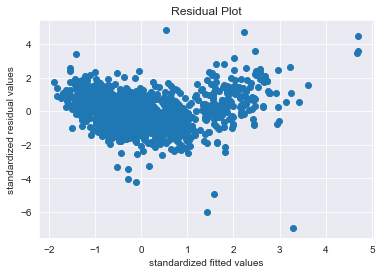

In [30]:
plt.scatter(standard_values(ols_reg.fittedvalues),standard_values(ols_reg.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

**Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors :-**
- Using Residual Regression Plots

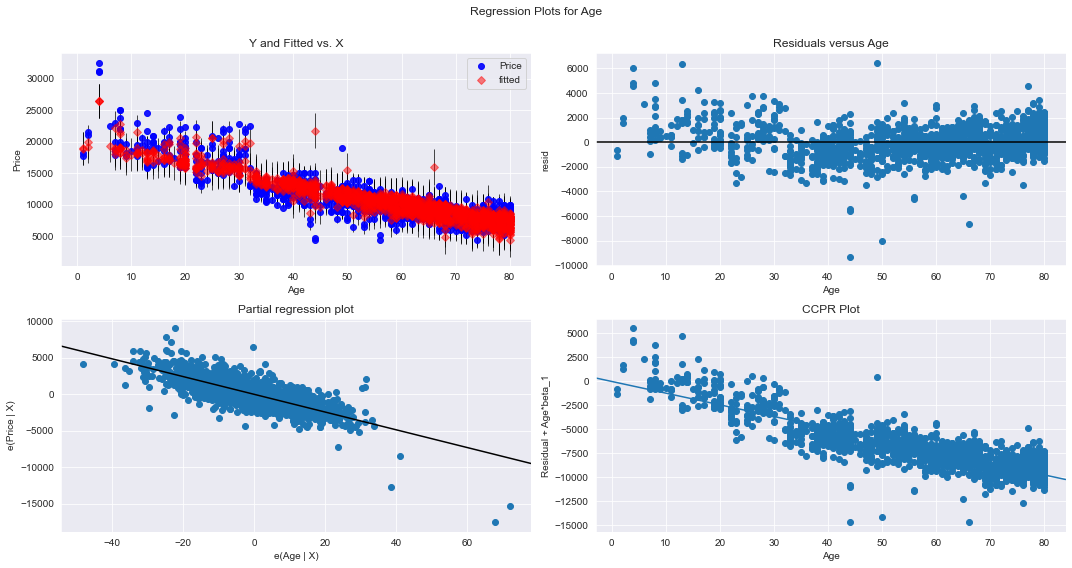

In [31]:
fig=plt.figure(figsize=(15,8))                                 # Residual regression plot for Age
sm.graphics.plot_regress_exog(ols_reg,'Age',fig=fig)
plt.show()

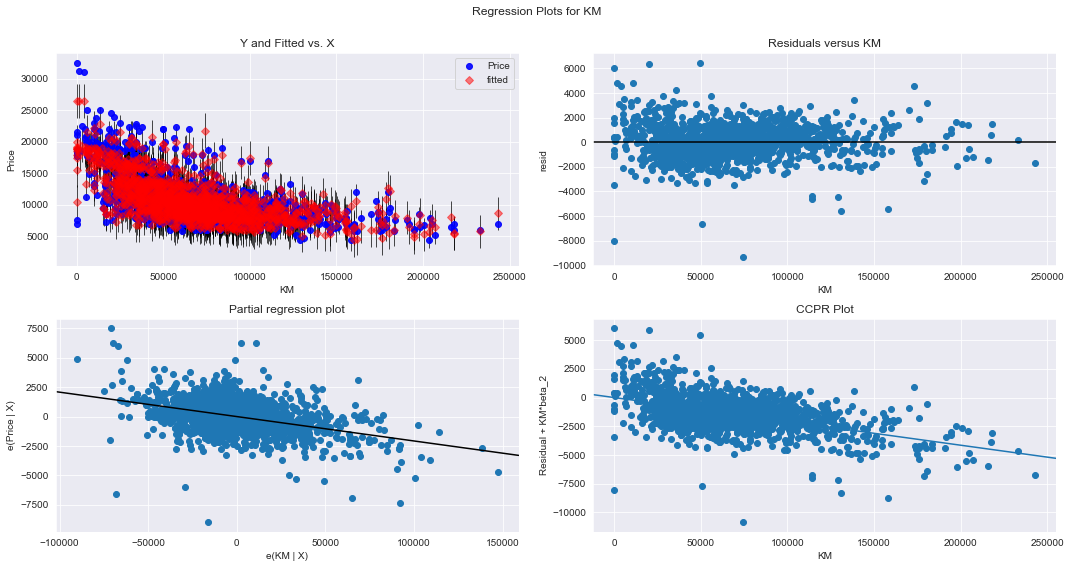

In [32]:
fig = plt.figure(figsize=(15,8))                              # Residual regression plot for KM
sm.graphics.plot_regress_exog(ols_reg,'KM',fig=fig)
plt.show()

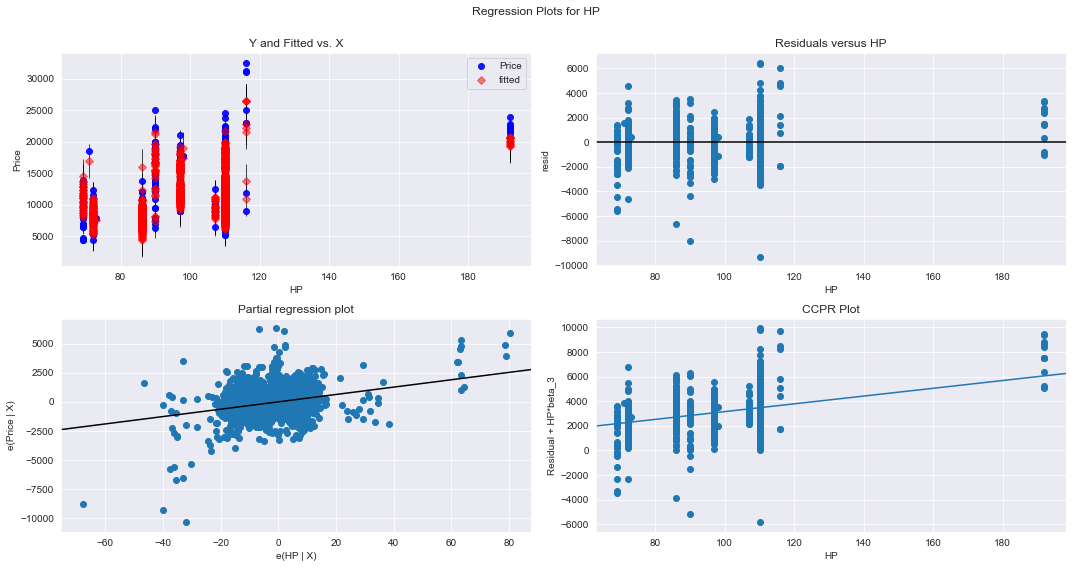

In [33]:
fig = plt.figure(figsize=(15,8))                             # Residual regression plot for HP
sm.graphics.plot_regress_exog(ols_reg,'HP',fig=fig)
plt.show()

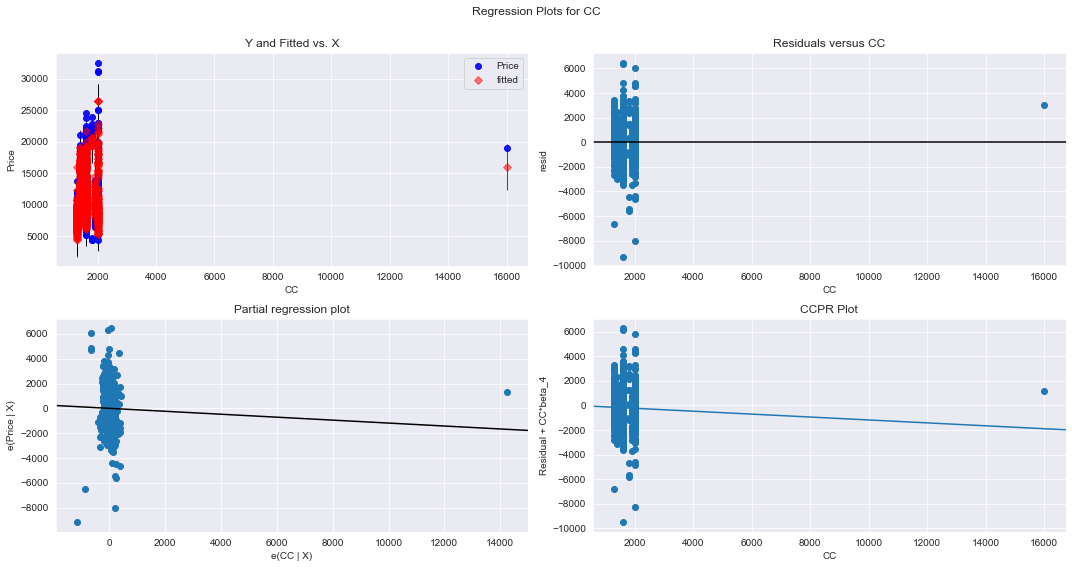

In [34]:
fig = plt.figure(figsize=(15,8))                              # Residual regression plot for CC
sm.graphics.plot_regress_exog(ols_reg,'CC',fig=fig)
plt.show()

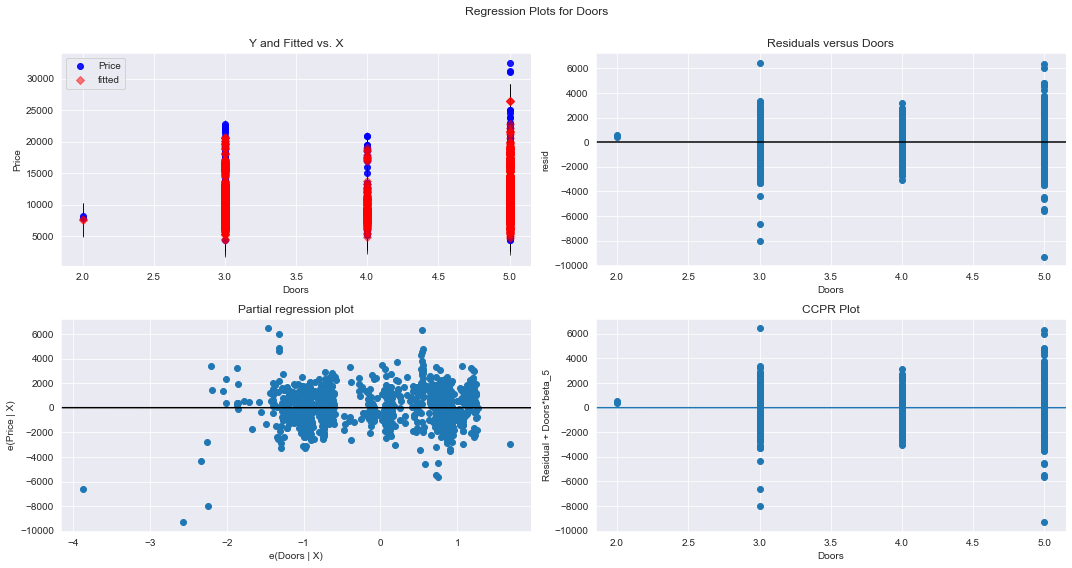

In [35]:
fig = plt.figure(figsize=(15,8))                                    # Residual regression plot for Doors
sm.graphics.plot_regress_exog(ols_reg,'Doors',fig=fig)
plt.show()

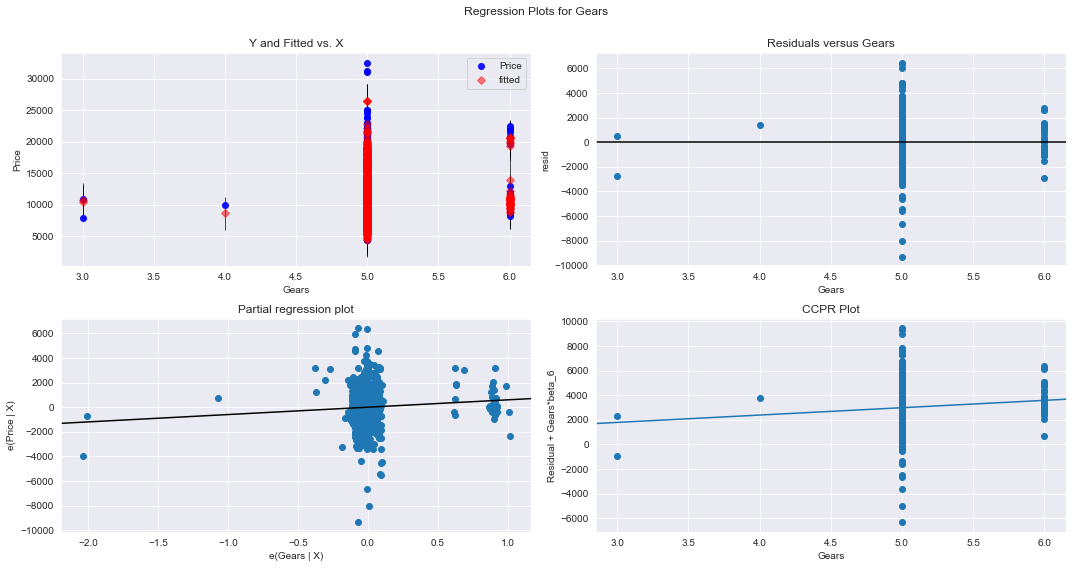

In [36]:
fig = plt.figure(figsize=(15,8))                                   # Residual regression plot for Gears
sm.graphics.plot_regress_exog(ols_reg,'Gears',fig=fig)
plt.show()

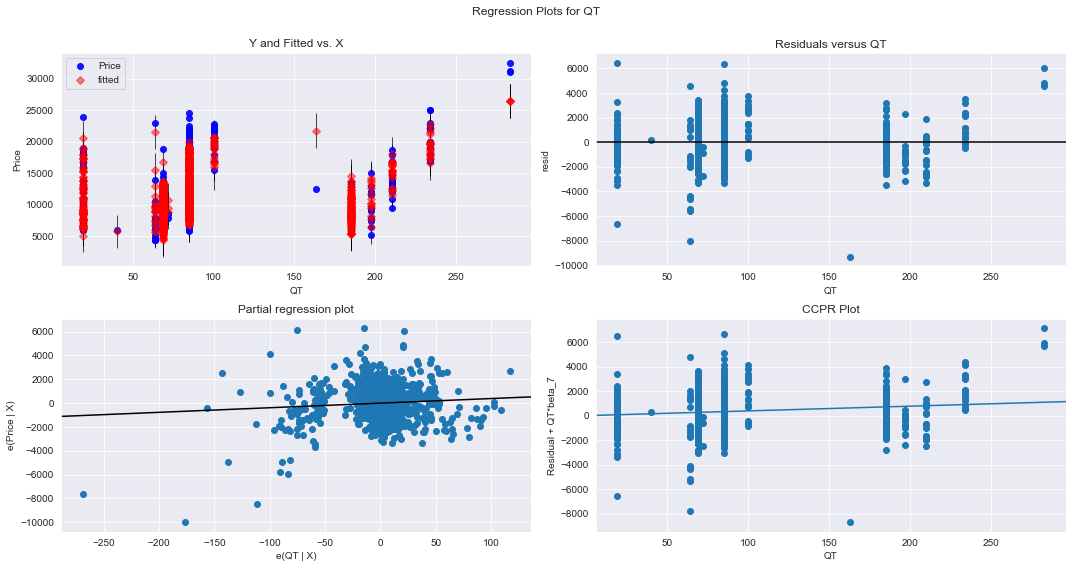

In [37]:
fig = plt.figure(figsize=(15,8))                             # Residual regression plot for QT 
sm.graphics.plot_regress_exog(ols_reg,'QT',fig=fig)
plt.show()

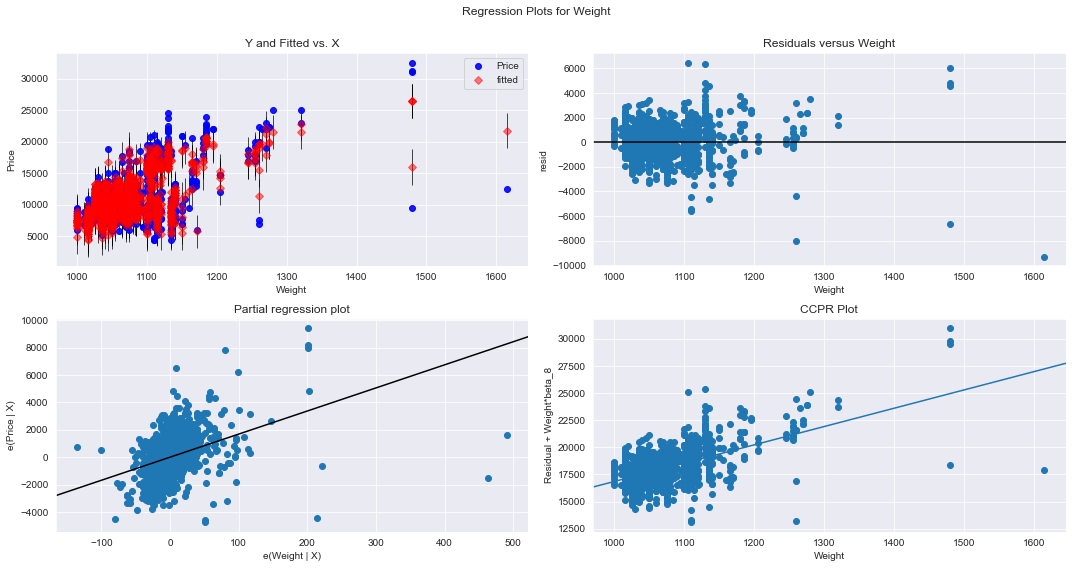

In [38]:
fig = plt.figure(figsize=(15,8))                             # Residual regression plot for Weight
sm.graphics.plot_regress_exog(ols_reg,'Weight',fig=fig)
plt.show()

### 8. Model Deletion

#### Cook's Distance  => used to check the outliers. 

- If Cook's distance > 1, then it's an outlier

In [39]:
(c,_) = ols_reg.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

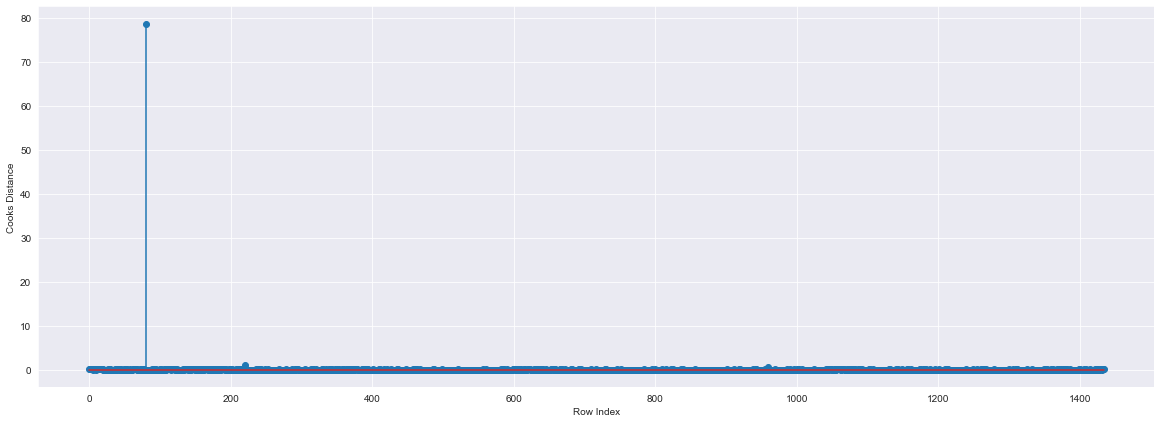

In [40]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(car_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
np.argmax(c) , round(np.max(c),2)           # Index & value of outlier where C >0.5

(80, 78.73)

### 9. Improving the model (for better accuracy)

In [42]:
new_data = car_data.copy()             # Creating a copy of data so that original dataset is not affected
new_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


*This time we can remove the data points which are outliers and reassign the row number*

In [43]:
car_data_2 = new_data.drop(new_data.index[[80]],axis=0).reset_index(drop=True)
car_data_2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [44]:
while ols_reg.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        ols_reg = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=car_data_2).fit()
        (c,_) = ols_reg.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        car_data_2 = car_data_2.drop(car_data_2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        car_data_2
    else:
        final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=car_data_2).fit()
        final_model.rsquared , final_model.aic
        print("Thus, model accuracy is improved to",round(final_model.rsquared,4))

Thus, model accuracy is improved to 0.8766
Thus, model accuracy is improved to 0.884
Thus, model accuracy is improved to 0.8882
Thus, model accuracy is improved to 0.8903
Thus, model accuracy is improved to 0.891
Thus, model accuracy is improved to 0.8923
Thus, model accuracy is improved to 0.8934
Thus, model accuracy is improved to 0.8947
Thus, model accuracy is improved to 0.8955
Thus, model accuracy is improved to 0.893
Thus, model accuracy is improved to 0.894
Thus, model accuracy is improved to 0.8954
Thus, model accuracy is improved to 0.896
Thus, model accuracy is improved to 0.8968
Thus, model accuracy is improved to 0.8964
Thus, model accuracy is improved to 0.8959
Thus, model accuracy is improved to 0.8954
Thus, model accuracy is improved to 0.8949
Thus, model accuracy is improved to 0.8961
Thus, model accuracy is improved to 0.8956
Thus, model accuracy is improved to 0.893
Thus, model accuracy is improved to 0.8904
Thus, model accuracy is improved to 0.8895
Thus, model accur

In [45]:
round(final_model.rsquared, 4)                 # Model Accuracy is increased to 90.04%

0.9004

In [46]:
car_data_2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


### 10. Model Prediction

In [47]:
data = pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [48]:
final_model.predict(data)                   # Manual Prediction of Price

0    14398.815471
dtype: float64

In [49]:
pred_y = final_model.predict(car_data_2)      # Automatic Prediction of Price with 90.02% accuracy
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**